## Task 1:

C:\Users\makal\AppData\Local\Temp\ipykernel_20532\3552604801.py:20: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=cmap)
C:\Users\makal\AppData\Local\Temp\ipykernel_20532\3552604801.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  if not plt.cm.get_cmap("red_blue_classes"):


[-0.02028233  0.01403643]
[0.96773196 0.97680415]
[-0.02028233  0.01403643]
[0.96773196 0.97680415]
[-0.12218273  0.13671786]
[1.07775432 4.25544374]
[-0.12218273  0.13671786]
[1.07775432 4.25544374]


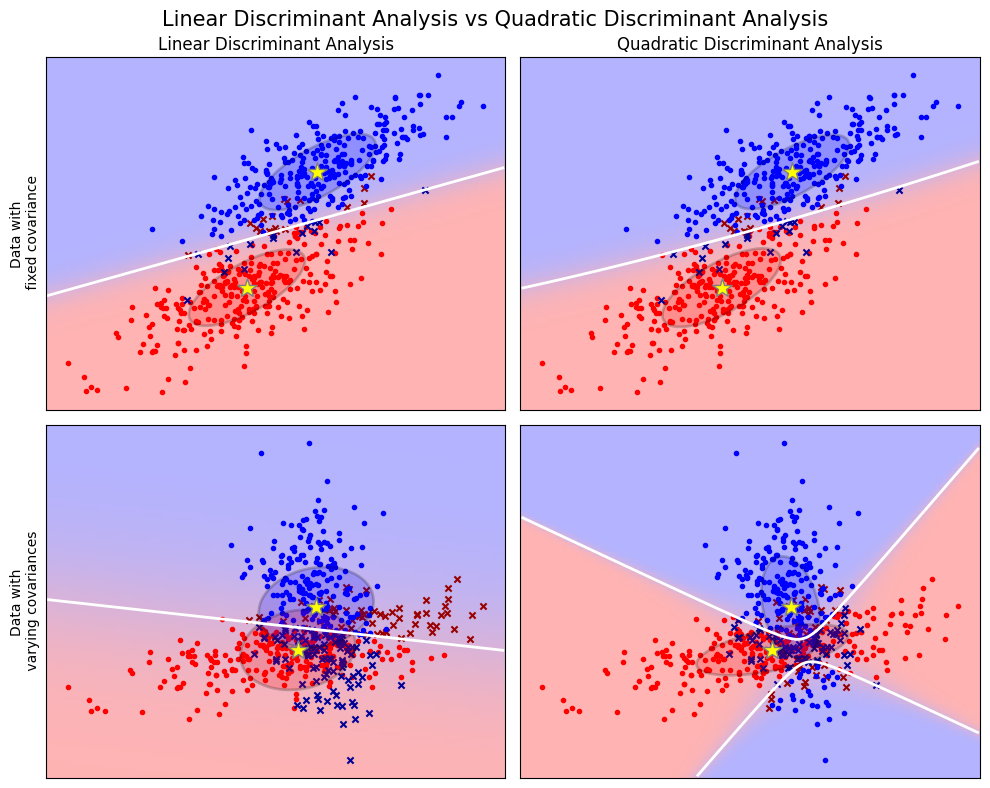

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 21 11:06:12 2022

@author: Kuba
"""

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.register_cmap(cmap=cmap)
if not plt.cm.get_cmap("red_blue_classes"):
    plt.cm.register_cmap(cmap=cmap)

import numpy as np


def dataset_fixed_cov():
    """Generate 2 Gaussians samples with the same covariance matrix"""
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -0.23], [0.83, 0.23]])
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C) + np.array([1, 1]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    """Generate 2 Gaussians samples with different covariance matrices"""
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

from scipy import linalg


def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title("Linear Discriminant Analysis")
        plt.ylabel("Data with\n fixed covariance")
    elif fig_index == 2:
        plt.title("Quadratic Discriminant Analysis")
    elif fig_index == 3:
        plt.ylabel("Data with\n varying covariances")

    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker=".", color="red")
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="x", s=20, color="#990000")  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker=".", color="blue")
    plt.scatter(
        X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#000099"
    )  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    print(mean)
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle = 180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")
    
plt.figure(figsize=(10, 8), facecolor="white")
plt.suptitle(
    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
    y=0.98,
    fontsize=15,
)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    # svd - Singular Value Decomposition
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis("tight")

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Task 2:

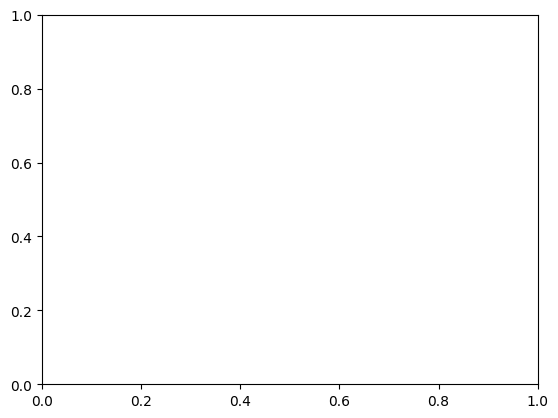

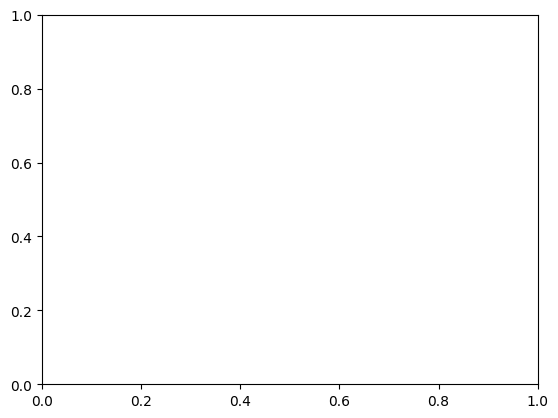

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 21 10:13:09 2022

@author: Kuba

based on code from Erik Linder-Norén (https://github.com/eriklindernoren) 
and Gilbert Tanner

"""
    
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Visualising the original data (first three features)

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
            1.1*X[y == label, 1].mean(),
            X[y == label, 2].mean(), name,
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1,
        edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


# set the target number of features (dimensions)
k = 3


n_features = X.shape[1]
labels = np.unique(y)

# within-class scatter matrix
S_W = np.empty((n_features, n_features))
for label in labels:
    xi = X[y == label]
    
    # increase S_W by a component for class i
    S_W += np.cov(xi, bias=False, rowvar=False) * (len(xi)-1)
    
# between-class scatter matrix

# calculate the mean value of the dataset, total_mean
total_mean = X.mean(axis = 0)

# create an empty array S_B with a proper shape
S_B = np.zeros((n_features, n_features))

for label in labels:
    xi = X[y == label]
    # calculate the mean mi of examples in class i
    mi = xi.mean(axis = 0)
    
    S_B += len(xi) * (mi - total_mean).dot((mi - total_mean).T)
    
# compute the matrix A = S_W^(-1) * S_B
S_W_INV = np.linalg.inv(S_W)
A = S_W_INV.dot(S_B)

# compute the eigenvectors and eigenvalues of A = S_W^(-1) * S_B
eigenvalues, eigenvectors = np.linalg.eigh(A)

# search for indices idx of the eigenvalues sorted in a decreasing order
idx = eigenvalues.argsort()[::-1]

# take the first k eigenvectors (so will be the number of features)
P = eigenvectors[:, idx][:, :k]

# scalar product X*P to get the projected space
new_space = X.dot(P)

if k == 3:
    y = iris.target

    fig = plt.figure(2)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    plt.cla()
    
    for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
        ax.text3D(new_space[y == label, 0].mean(),
                1.1*new_space[y == label, 1].mean(),
                new_space[y == label, 2].mean(), name,
                horizontalalignment='center',
                bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
        
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(float)

    ax.scatter(new_space[:, 0], new_space[:, 1], new_space[:, 2], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
    
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    
    plt.show()
elif k==2:
    y = iris.target

    fig, ax = plt.subplots()

    # plt.clf()
    # plt.cla()
    
    for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
        ax.text(new_space[y == label, 0].mean(),
                1.3*new_space[y == label, 1].mean(),
                name,
                horizontalalignment='center',
                bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    y = np.choose(y, [1, 2, 0]).astype(float)

    ax.scatter(new_space[:, 0], new_space[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    plt.show()

## Task 3:

explained variance ratio (first two components): [0.92461872 0.05306648]


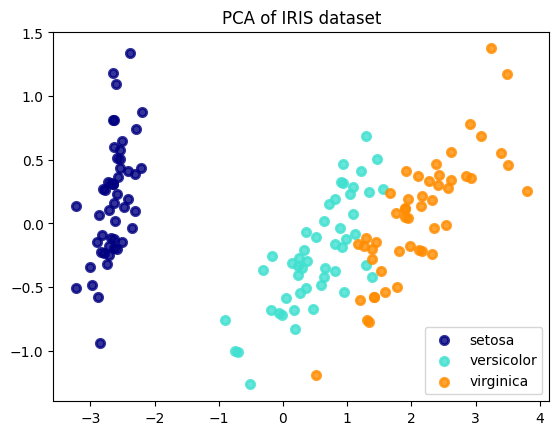

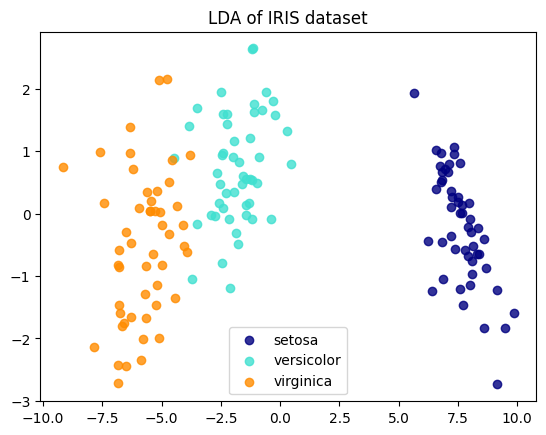

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 21 18:31:14 2022

@author: Kuba

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

"""

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

## Task 4: